In [22]:
import numpy as np
from effFunctions import getMuonRecoEff, getTriggerEff,getSelectionEff,getTrackEff

import itertools
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu_r')

/tmp/ipykernel_67323/507244012.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu_r')


### Get Muon Tagging Efficiency

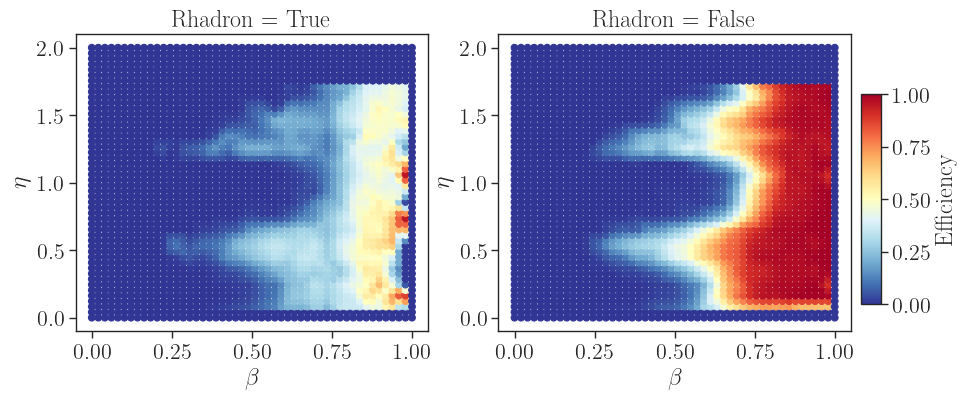

In [23]:
useRHadron = [False,True]
etaVals = np.linspace(0.,2.0,50)
betaVals = np.linspace(0.,1.0,50)

fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(10,3))
useRHadron = [True,False]
for isr,sr in enumerate(useRHadron):
    ax = axarr[isr]
    eff = np.array([[beta,eta,getMuonRecoEff(beta,eta,sr)] for (beta,eta) in itertools.product(betaVals,etaVals)])
    p = ax.scatter(eff[:,0],eff[:,1],c=eff[:,2],cmap=cm,vmin=0.,vmax=1.0)
    ax.set_title(r'Rhadron = %s' %sr)
    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$\eta$')
    # ax.set_yscale('log')
    # ax.set_xscale('log')
    # ax.set_xlim(5.,5000.)
    # ax.set_ylim(4,200.)
   
fig.subplots_adjust(right=0.9,top=1.1)
cbar_ax = fig.add_axes([0.91, 0.2, 0.02, 0.7])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label='Efficiency',cax=cbar_ax)
# plt.tight_layout()
plt.show()

### Get Trigger and Event Efficiencies

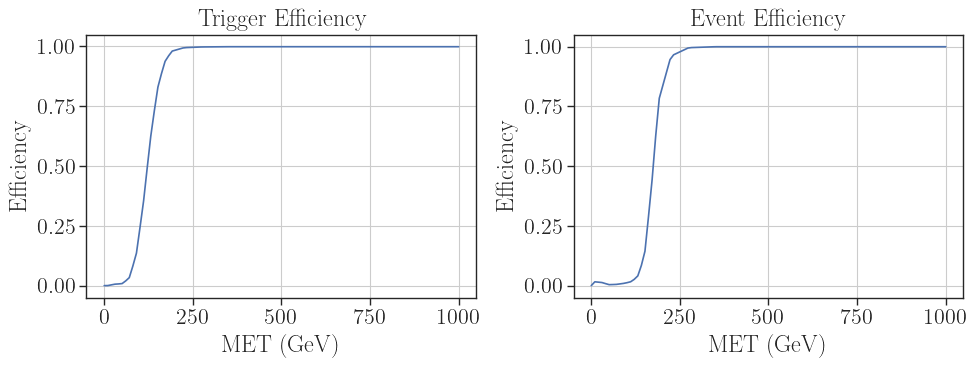

In [26]:
metVals = np.linspace(0.0,1000.,100)
fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
funcs = [getTriggerEff,getSelectionEff]
titles = ['Trigger Efficiency','Event Efficiency']
for isr,f in enumerate(funcs):
    ax = axarr[isr]
    y = [f(met) for met in metVals]
    ax.plot(metVals,y)
    ax.set_title(r'%s' %titles[isr])
    ax.set_xlabel(r'MET (GeV)')
    ax.set_ylabel('Efficiency')
    ax.grid()
plt.tight_layout()
plt.show()

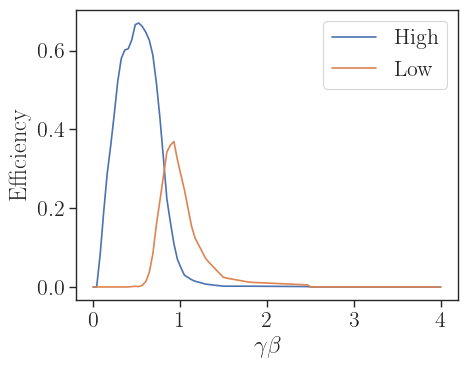

In [28]:
gbVals = np.linspace(0.0,4.,100)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
funcs = [getTriggerEff,getSelectionEff]
srs = ['High','Low']
for isr,sr in enumerate(srs):
    y = [getTrackEff(gb,sr) for gb in gbVals]
    ax.plot(gbVals,y,label=sr)
    ax.set_xlabel(r'$\gamma\beta$')
    ax.set_ylabel('Efficiency')
    ax.grid()
plt.legend()
plt.tight_layout()
plt.show()